In [1]:
import os
import itertools
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams.update({"font.size": 9})
# PyTorch
import torch

In [2]:
import sys
sys.path.append("../src/")

%load_ext autoreload
%autoreload 2
# Importing our custom module(s)
import utils

/cluster/tufts/hugheslabkp/eharve06/miniconda3/envs/l3d_2024f_cuda12_1/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


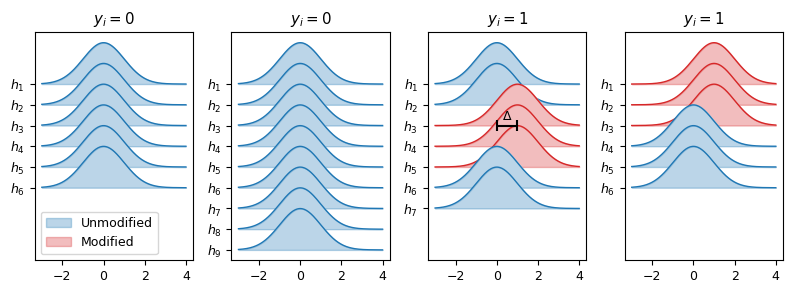

In [3]:
H, h, delta, S_low, S_high, deltaS, p_y1, seed = 1, 1, 1.0, 6, 10, 3, 0.5, 2
X, lengths, u, y = utils.generate_toy_data(4, H=H, h=h, delta=delta, S_low=S_low, S_high=S_high, deltaS=deltaS, p_y1=p_y1, seed=seed)

ncols, nrows = 4, 1
fig, axs = plt.subplots(figsize=(2*ncols, 3*nrows), ncols=ncols, nrows=nrows)

offset = 0.2

for i in range(len(lengths)):
    
    for j in range(lengths[i]):
        is_modified = u[i] <= j < u[i] + deltaS and y[i] == 1
        color = "#D62728" if is_modified else "#1F77B4"
        x_axis = torch.linspace(start=-3, end=3 + delta, steps=1000)
        y_axis = utils.normal_pdf(x_axis, delta, 1) if is_modified else utils.normal_pdf(x_axis, 0, 1)
        
        y_offset = (max(lengths) * offset) - (j * offset)
        axs[i].fill_between(x_axis, y_offset, y_axis + y_offset, alpha=1.0, color="#FFFFFF", zorder=0)
        axs[i].fill_between(x_axis, y_offset, y_axis + y_offset, alpha=0.3, color=color, zorder=0)
        axs[i].plot(x_axis, y_axis + y_offset, color=color, linewidth=1, zorder=0)
    
    axs[i].scatter(0, offset, alpha=0.0)
    axs[i].set_yticks([(max(lengths) * offset) - (j * offset) for j in range(lengths[i])])
    axs[i].set_yticklabels([rf"$h_{{{j}}}$" for j in range(1, lengths[i]+1)])
    axs[i].set_title(rf"$y_i={int(y[i])}$")
    

i = (y==1).int().argmax()
x0, x1 = 0, delta
y0 = (max(lengths) * offset) - ((u[i]) * offset)
axs[i].vlines(x0, y0 - 0.05, y0 + 0.05, color='#000000')
axs[i].hlines(y0, x0, x1, color='#000000')
axs[i].vlines(x1, y0 - 0.05, y0 + 0.05, color='#000000')
axs[i].text((x0 + x1) / 2, y0 + 0.05, r'$\Delta$', ha='center')

axs[0].fill_between([], [], [], alpha=0.3, color="#1F77B4", label="Unmodified")
axs[0].fill_between([], [], [], alpha=0.3, color="#D62728", label="Modified")
axs[0].legend()

fig.tight_layout()
fig.savefig("toy_data_visualization.pdf", bbox_inches="tight")
plt.show()